In [ ]:
import pyarrow
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
input_filename = 'results/finches_interaction_results_chunked.parquet'

df = pq.read_table(input_filename).to_pandas()
print(df.columns)

df_attractive = df[df['interaction_type'] == 'attraction']
df_repulsive = df[df['interaction_type'] == 'repulsion']

print(len(df_attractive))
print(len(df_repulsive))

In [9]:
df_na = df[df['interaction_type'] == 'N/A']
print(len(df_na))
na_viruses = df['s1_id'].unique()
print(len(na_viruses))

15549
213


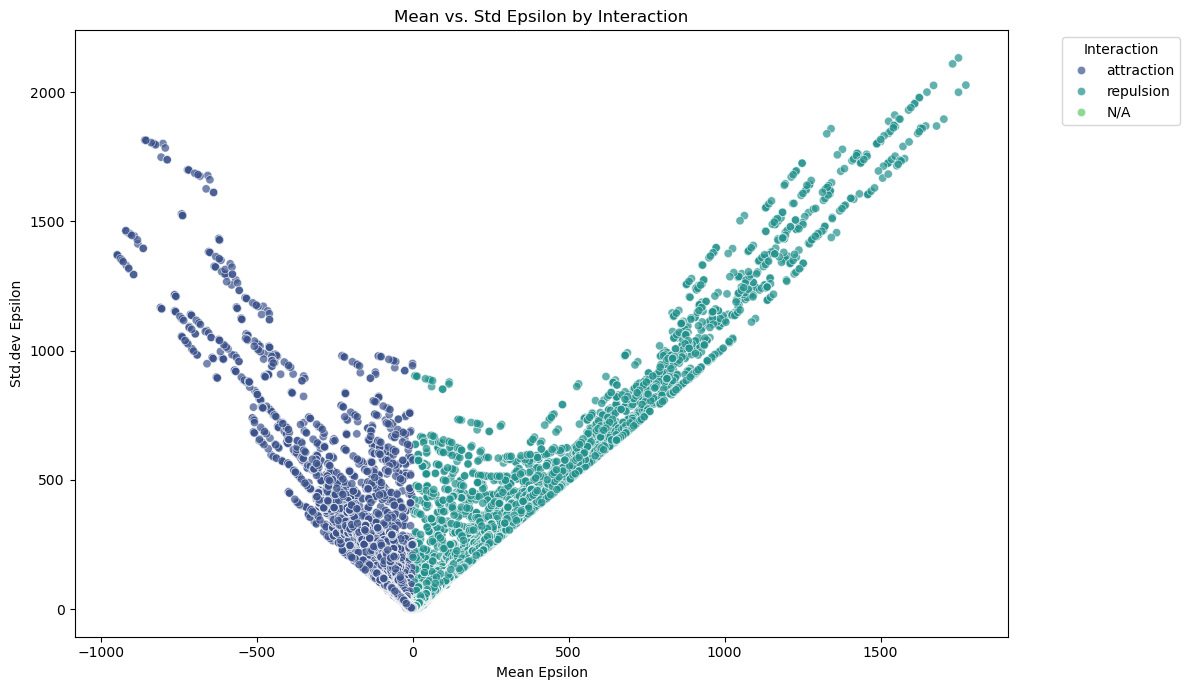

In [2]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mean_epsilon', y='std_epsilon',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('Mean vs. Std Epsilon by Interaction')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

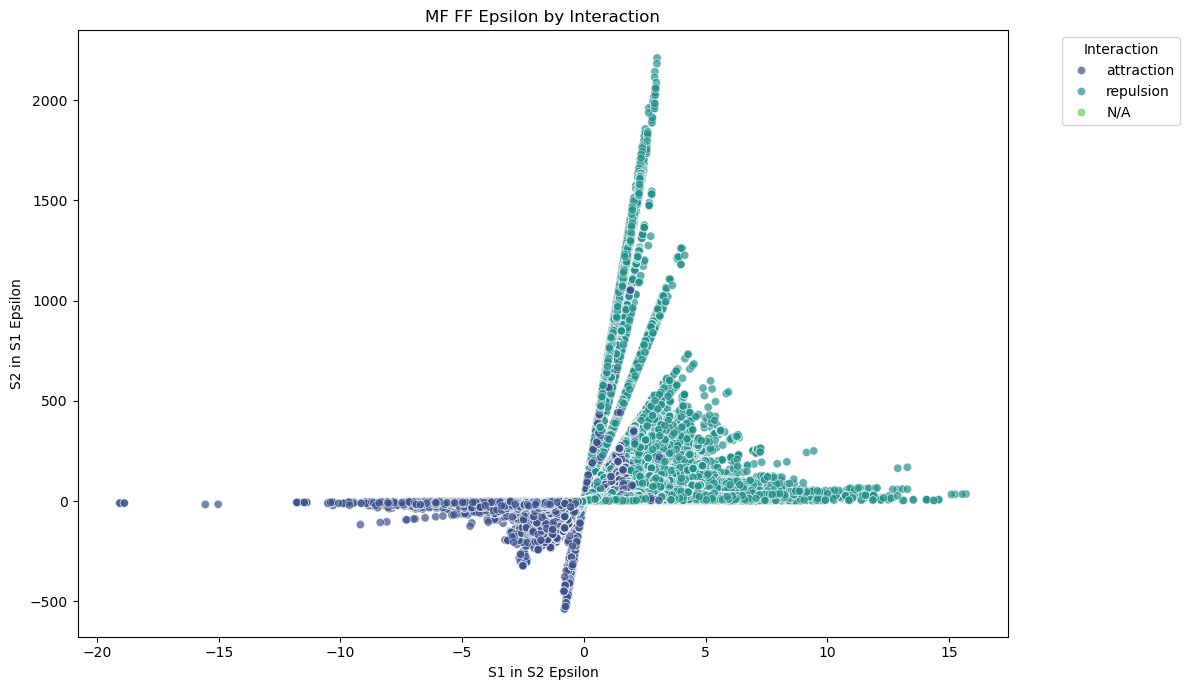

In [3]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='mf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

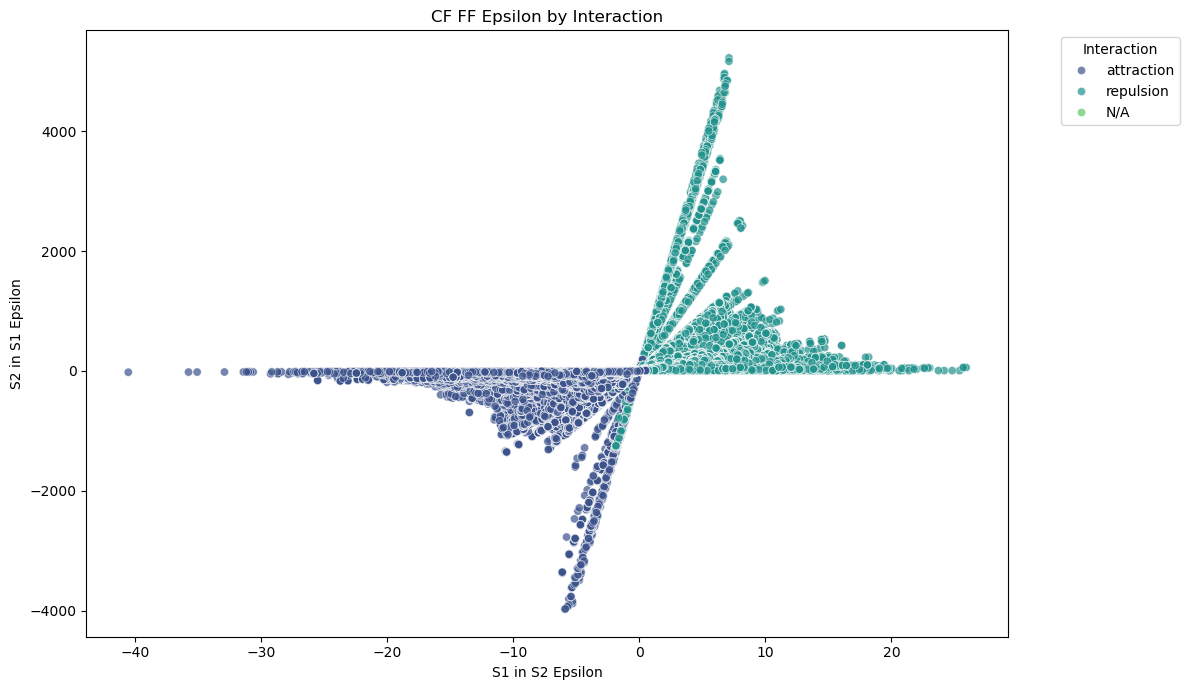

In [4]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='cf_s1_s2', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('CF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

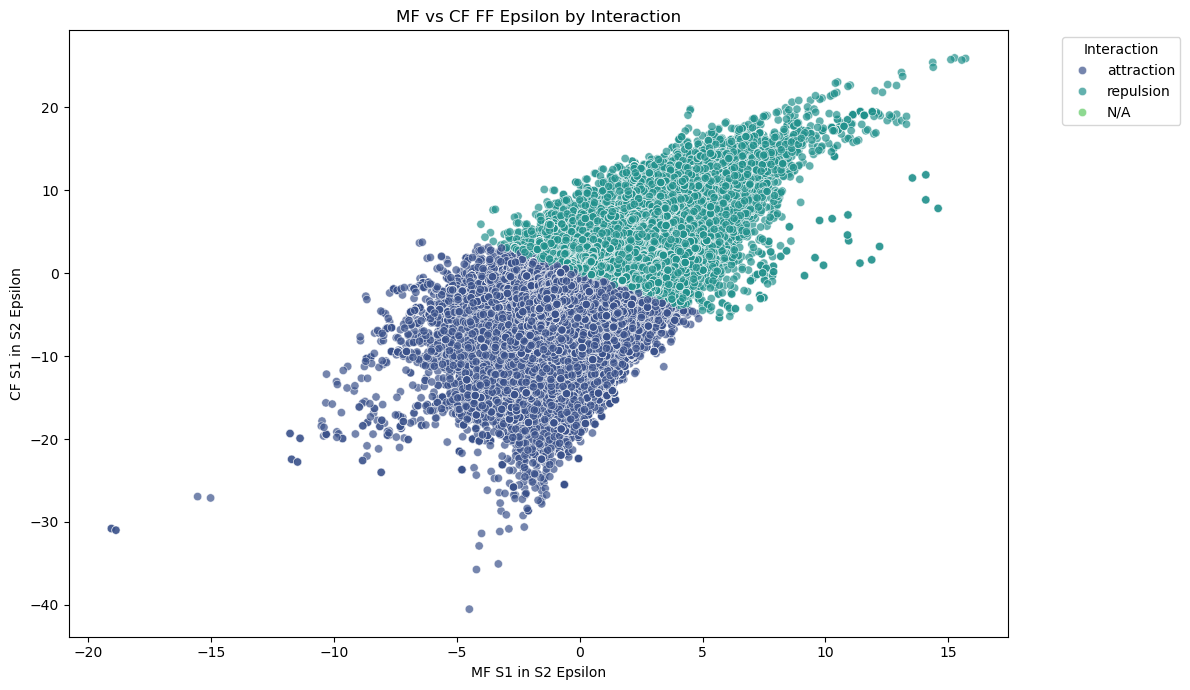

In [5]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='cf_s1_s2',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S1 in S2 Epsilon')
plt.ylabel('CF S1 in S2 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

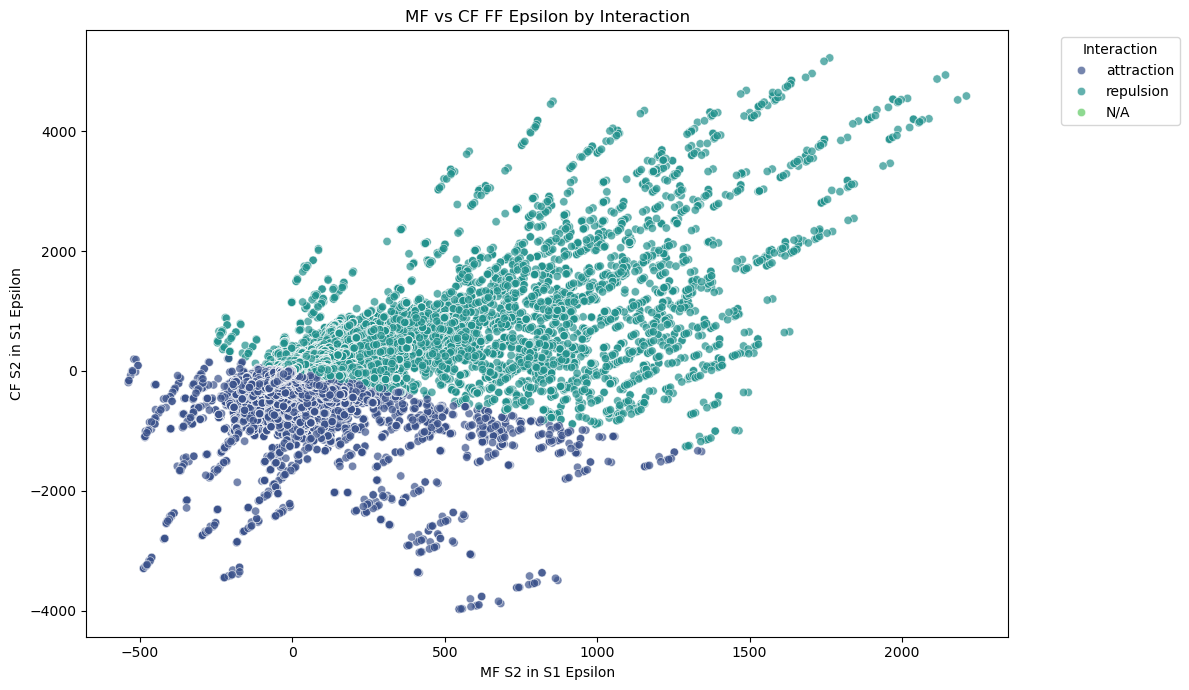

In [6]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s2_s1', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S2 in S1 Epsilon')
plt.ylabel('CF S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [3]:
df_melted = df.melt(id_vars=['s1_id', 's2_id'],
                    value_vars=['mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1'],
                    var_name='metric_type',
                    value_name='value')

/scratch/370539.1.ood/ipykernel_598598/1653954801.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/projectnb/cancergrp/Philipp/.conda/envs/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


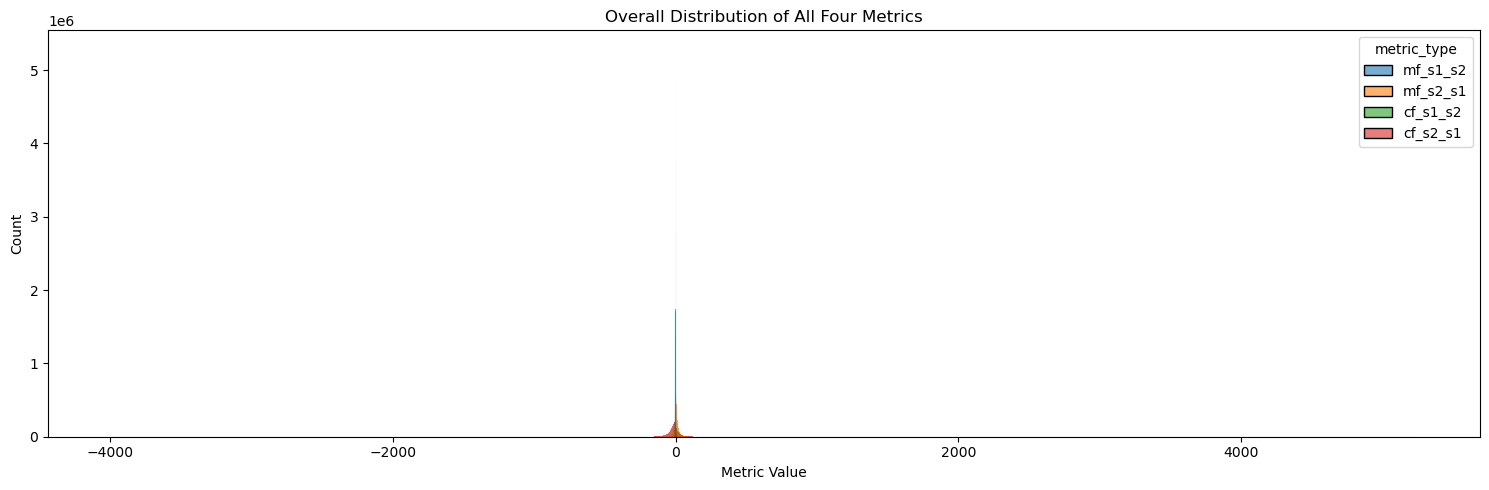

/scratch/370539.1.ood/ipykernel_598598/1653954801.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/projectnb/cancergrp/Philipp/.conda/envs/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


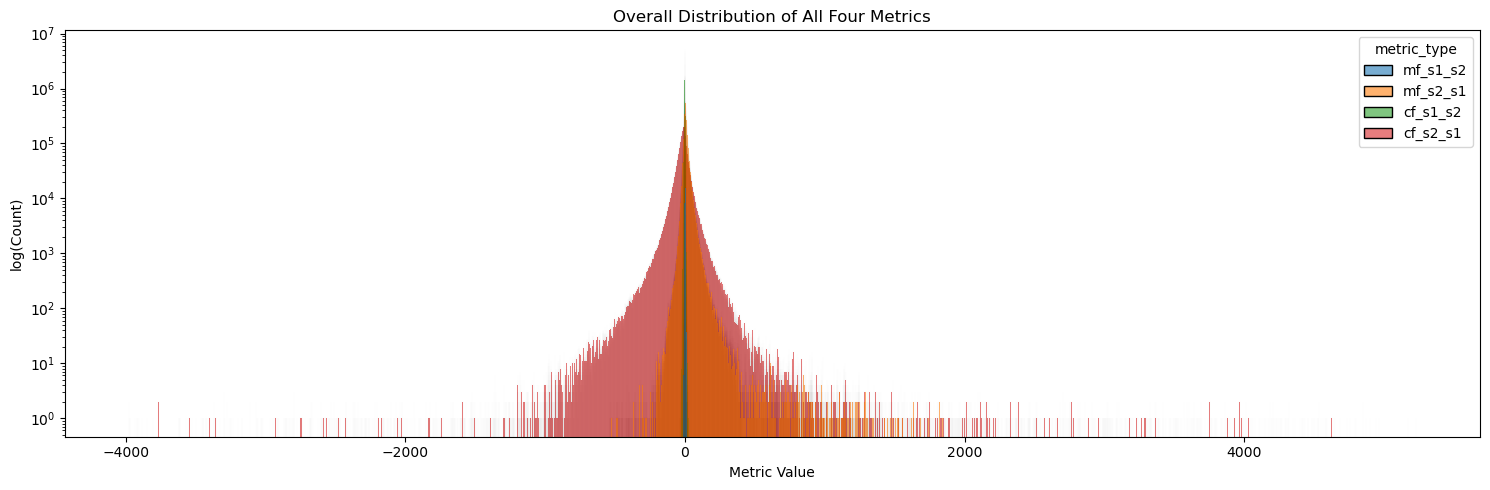

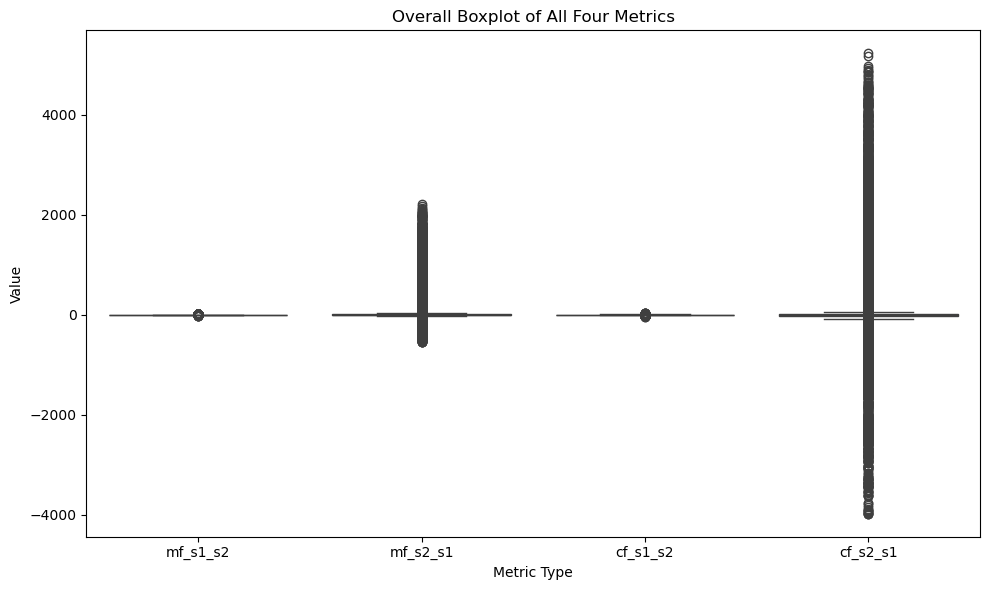

In [12]:
# Overall distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Overall log distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.yscale('log')
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('log(Count)')
plt.tight_layout()
plt.show()

# Boxplot comparing the overall distributions of the 4 metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='metric_type', y='value')
plt.title('Overall Boxplot of All Four Metrics')
plt.xlabel('Metric Type')
plt.ylabel('Value')
plt.tight_layout()
plt.show()